<a href="https://colab.research.google.com/github/YejinShin1/god_yes_jeans/blob/master/topic_modelling_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import pandas as pd 
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import CoherenceModel
from gensim import corpora, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [ ]:
file_name = os.listdir('./')
file_name

['.config', 'sample_data']

In [ ]:
df = pd.read_excel('KCTI_NATIVE_2020.xlsx')
df.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,경기,세종,.,취미오락,유흥,M,40,202001,RED,휴식,6410700,45
1,경남,세종,.,스포츠활동,레저스포츠,M,30,202001,RED,활동,147900,15
2,광주,세종,.,취미오락,패션쇼핑,M,30,202001,RED,휴식,793050,5
3,인천,세종,.,취미오락,인터넷게임,M,30,202001,RED,취침,10200,10
4,경기,세종,.,취미오락,유흥,M,40,202001,RED,취침,382500,5


In [ ]:
after_covid = df[df['ta_ym'] == 202002]

In [ ]:
a_v1 = after_covid['v1'].tolist()
a_v2 = after_covid['v2'].tolist()
#v3 = df['v3'].tolist()
a_gb3 = after_covid['gb3'].tolist()
a_gb2 = after_covid['gb2'].tolist()
a_sex_ccd = after_covid['sex_ccd'].tolist()
a_cln_age_r = after_covid['cln_age_r'].tolist()
a_ta_ym = after_covid['ta_ym'].tolist()
a_daw_ccd_r = after_covid['daw_ccd_r'].tolist()
a_apv_ts_dl_tm_r = after_covid['apv_ts_dl_tm_r'].tolist()

a_cln_age_r = [str(age) for age in a_cln_age_r]
a_ta_ym = [str(ym) for ym in a_ta_ym]

a_v1 = [city + str("_거주지") for city in a_v1]
a_v2 = [city + str("_사용장소") for city in a_v2]

In [ ]:
a_list = list(zip(a_v1, a_v2, a_gb3, a_gb2, a_sex_ccd, a_cln_age_r, a_ta_ym, a_daw_ccd_r, a_apv_ts_dl_tm_r))
a_list = [list(customer) for customer in a_list]
a_list[:10]

[['세종_거주지', '세종_사용장소', '취미오락', '외식', 'M', '30', '202002', 'RED', '휴식'],
 ['세종_거주지', '세종_사용장소', '취미오락', '외식', 'F', '20', '202002', 'RED', '활동'],
 ['충북_거주지', '세종_사용장소', '취미오락', '외식', 'M', '50', '202002', 'WHITE', '활동'],
 ['경기_거주지', '세종_사용장소', '취미오락', '외식', 'F', '60', '202002', 'WHITE', '휴식'],
 ['세종_거주지', '세종_사용장소', '취미오락', '애완동물돌보기', 'M', '50', '202002', 'WHITE', '활동'],
 ['충남_거주지', '세종_사용장소', '취미오락', '외식', 'F', '40', '202002', 'WHITE', '활동'],
 ['전남_거주지', '세종_사용장소', '취미오락', '종합쇼핑', 'M', '30', '202002', 'RED', '활동'],
 ['전북_거주지', '세종_사용장소', '취미오락', '종합쇼핑', 'F', '50', '202002', 'WHITE', '활동'],
 ['대전_거주지', '세종_사용장소', '취미오락', '교육훈련', 'F', '40', '202002', 'WHITE', '활동'],
 ['전북_거주지', '세종_사용장소', '취미오락', '외식', 'F', '50', '202002', 'WHITE', '활동']]

In [ ]:
a_dictionary = corpora.Dictionary(a_list)
a_corpus = [a_dictionary.doc2bow(text) for text in a_list]

print('Number of unique tokens: %d' % len(a_dictionary))
print('Number of documents: %d' % len(a_corpus))

Number of unique tokens: 78
Number of documents: 33172


In [ ]:
a_ldamodel.log_perplexity(a_corpus)

-3.819815745221268

In [ ]:
start1 = 2
limit1 = 40
step1 = 6
a_perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(a_corpus, num_topics=num_topics,
                    id2word=a_dictionary,
                    alpha='auto')
    a_perplexity_scores.append(a_ldamodel.log_perplexity(a_corpus))

In [ ]:
a_perplexity_scores 

[-3.819991581427346,
 -3.8196996870155107,
 -3.81969616319685,
 -3.8198535794572086,
 -3.8197434905659455,
 -3.819883404689855,
 -3.819832858509224]

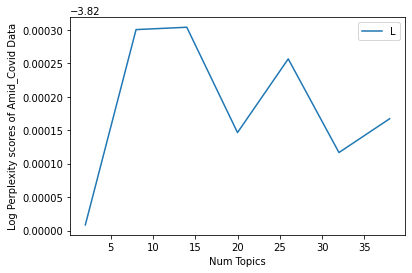

In [ ]:
import matplotlib.pyplot as plt
x = range(start1, limit1, step1)
plt.plot(x, a_perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores of Amid_Covid Data")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

In [ ]:
a_ldamodel = models.ldamodel.LdaModel(a_corpus, num_topics=20,
                        id2word=a_dictionary,
                        alpha='auto')
a_ldamodel.print_topics(num_words=20)

[(0,
  '0.225*"취침" + 0.112*"202002" + 0.108*"취미오락" + 0.088*"F" + 0.072*"RED" + 0.067*"서울_사용장소" + 0.067*"외식" + 0.052*"20" + 0.045*"50" + 0.040*"WHITE" + 0.034*"경기_거주지" + 0.026*"유흥" + 0.021*"M" + 0.011*"경기_사용장소" + 0.009*"충북_거주지" + 0.007*"휴식" + 0.005*"60" + 0.003*"활동" + 0.003*"40" + 0.002*"강원_거주지"'),
 (1,
  '0.184*"인천_거주지" + 0.111*"202002" + 0.102*"경기_사용장소" + 0.101*"취미오락" + 0.084*"활동" + 0.076*"RED" + 0.070*"M" + 0.070*"60" + 0.047*"F" + 0.045*"외식" + 0.039*"WHITE" + 0.022*"20" + 0.014*"50" + 0.012*"종합쇼핑" + 0.006*"30" + 0.006*"취침" + 0.004*"40" + 0.001*"인천_사용장소" + 0.001*"경북_사용장소" + 0.001*"휴식"'),
 (2,
  '0.214*"대전_거주지" + 0.124*"대전_사용장소" + 0.106*"202002" + 0.078*"취미오락" + 0.074*"WHITE" + 0.065*"M" + 0.055*"휴식" + 0.048*"F" + 0.046*"30" + 0.040*"RED" + 0.034*"활동" + 0.027*"20" + 0.027*"세종_사용장소" + 0.023*"외식" + 0.016*"40" + 0.007*"50" + 0.002*"종합쇼핑" + 0.002*"60" + 0.002*"인터넷게임" + 0.002*"대구_거주지"'),
 (3,
  '0.216*"종합쇼핑" + 0.131*"취미오락" + 0.116*"202002" + 0.075*"F" + 0.073*"WHITE" + 0.055*"40" + 0.055*"

In [ ]:
#!pip install pyLDAvis
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
prepared_data_b = gensimvis.prepare(a_ldamodel, a_corpus, a_dictionary)

In [ ]:
pyLDAvis.display(prepared_data_b)

In [ ]:
pyLDAvis.save_html(prepared_data_b, 'LDAvis_a_20.html' )